In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
nas_full = pd.read_csv('../datasets/nas/nas_full.csv');

# trimming all whitespaces from cells
df_obj = nas_full.select_dtypes(['object'])
nas_full[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

nas_full.iloc[:,:]

df1 = nas_full.drop_duplicates(subset=['STUID'], keep=False)
df1 

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33
5,11011001006,AP,1,2,3,3,1,5,2,3,...,1,4,3,2,4,4,NaN,23.33,NaN,30.00
6,11011001007,AP,1,2,3,4,2,2,2,1,...,3,4,4,4,4,4,40.74,70.00,NaN,NaN
7,11011001008,AP,1,2,2,0,2,4,2,1,...,3,4,3,3,3,4,NaN,26.67,NaN,22.92
8,11011001009,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,24.07,NaN,25.45,NaN
9,11011001010,AP,1,2,2,4,2,3,2,1,...,3,4,3,4,3,4,18.52,26.67,NaN,NaN


In [10]:
#IGNORE
len(df1[(df1['Maths %'] > 80) & (df1.Distance == 0)])

38

In [12]:
#IGNORE
df_distance_maths = pd.DataFrame(columns = ['Top', 'Mid', 'Fail']);
j=0;
for i in df1.Distance.unique():
    #Count of students with maths marks > 80 & Distance = row_num
    df_distance_maths.loc[j] = [len(df1[(df1['Maths %'] > 80) & (df1.Distance == j)]), len(df1[(df1['Maths %'] < 81) & (df1['Maths %'] > 32) & (df1.Distance == j)]), len(df1[(df1['Maths %'] < 33) & (df1.Distance == j)])] 
    j+=1;
df_distance_maths

,Top,Mid,Fail
0,38.0,920.0,1970.0
1,994.0,19828.0,35708.0
2,276.0,7169.0,12980.0
3,76.0,2415.0,5058.0
4,64.0,2256.0,4869.0


In [15]:
#IGNORE
df1.corr()
#df1.corr().to_csv('../datasets/OneLineCodeCorrelation.csv')

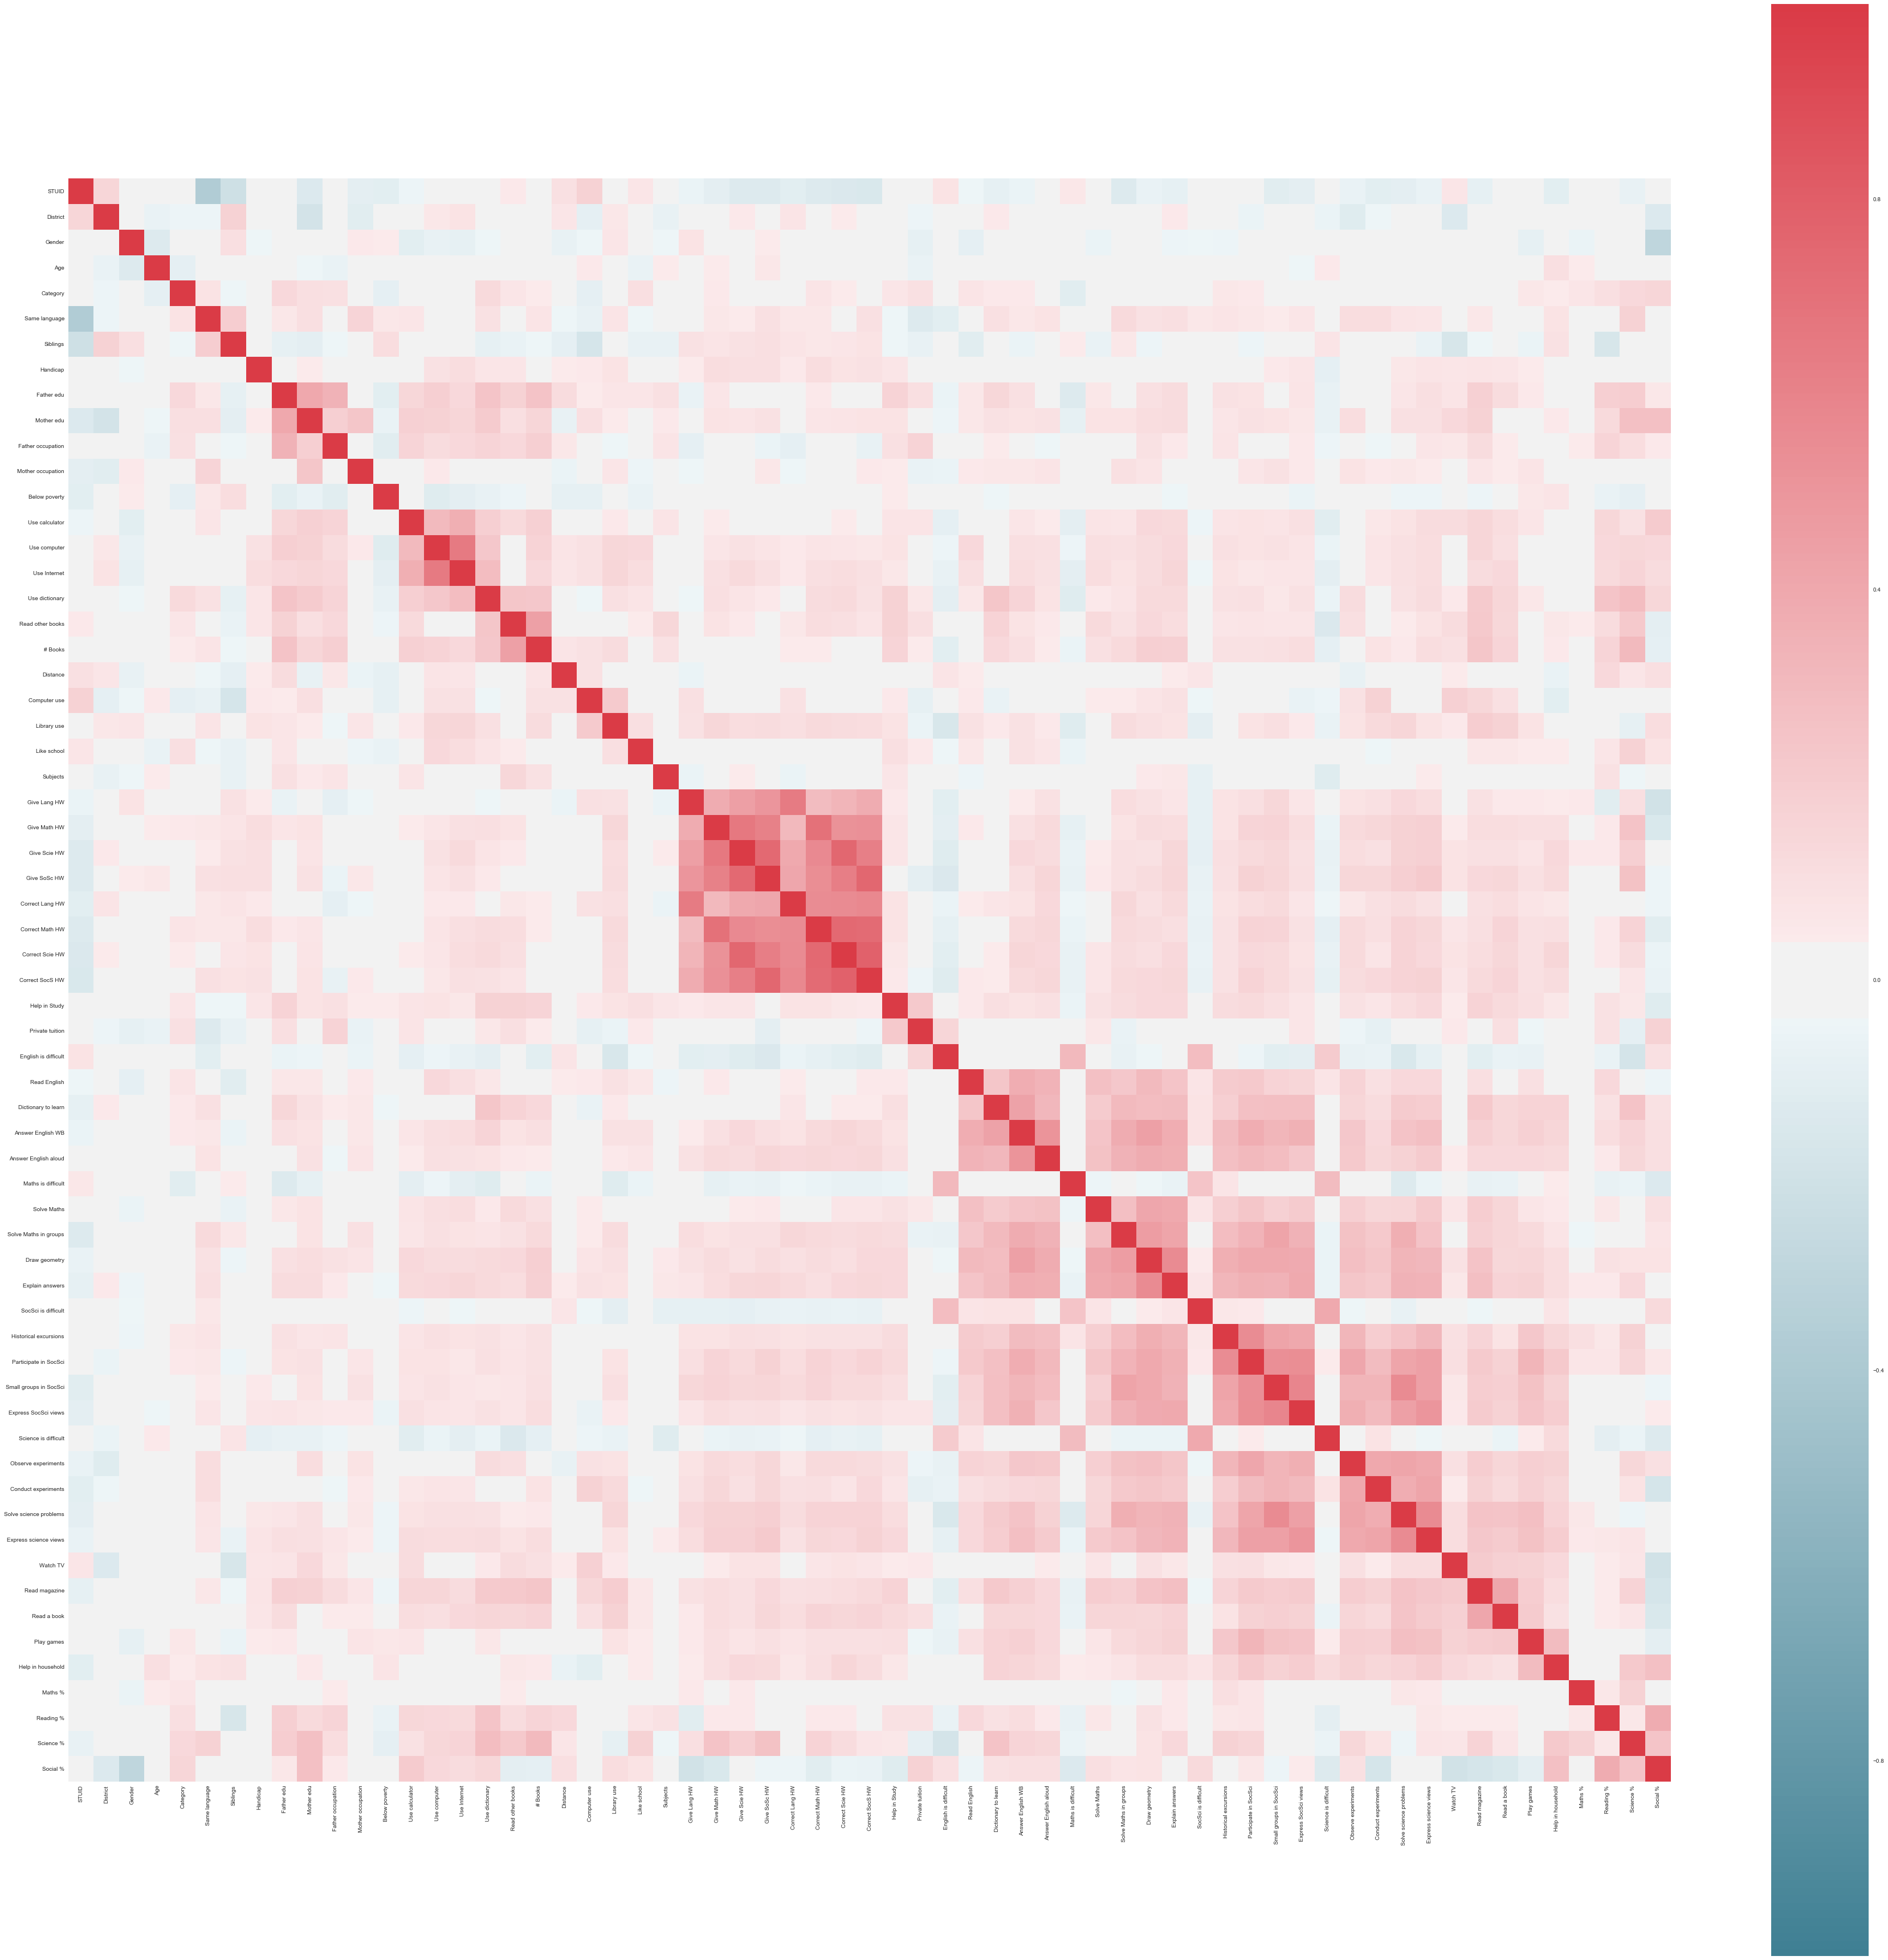

In [47]:
#Dividing Toppers
df_Top = df1.copy();
df_Top = df_Top.loc[df_Top['Maths %'] > 80];
corr = df_Top.corr()
f, ax = plt.subplots(figsize=(63, 63))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [20]:
df_Top.corr().to_csv('../datasets/nas/MathsToppersCorrelation.csv')

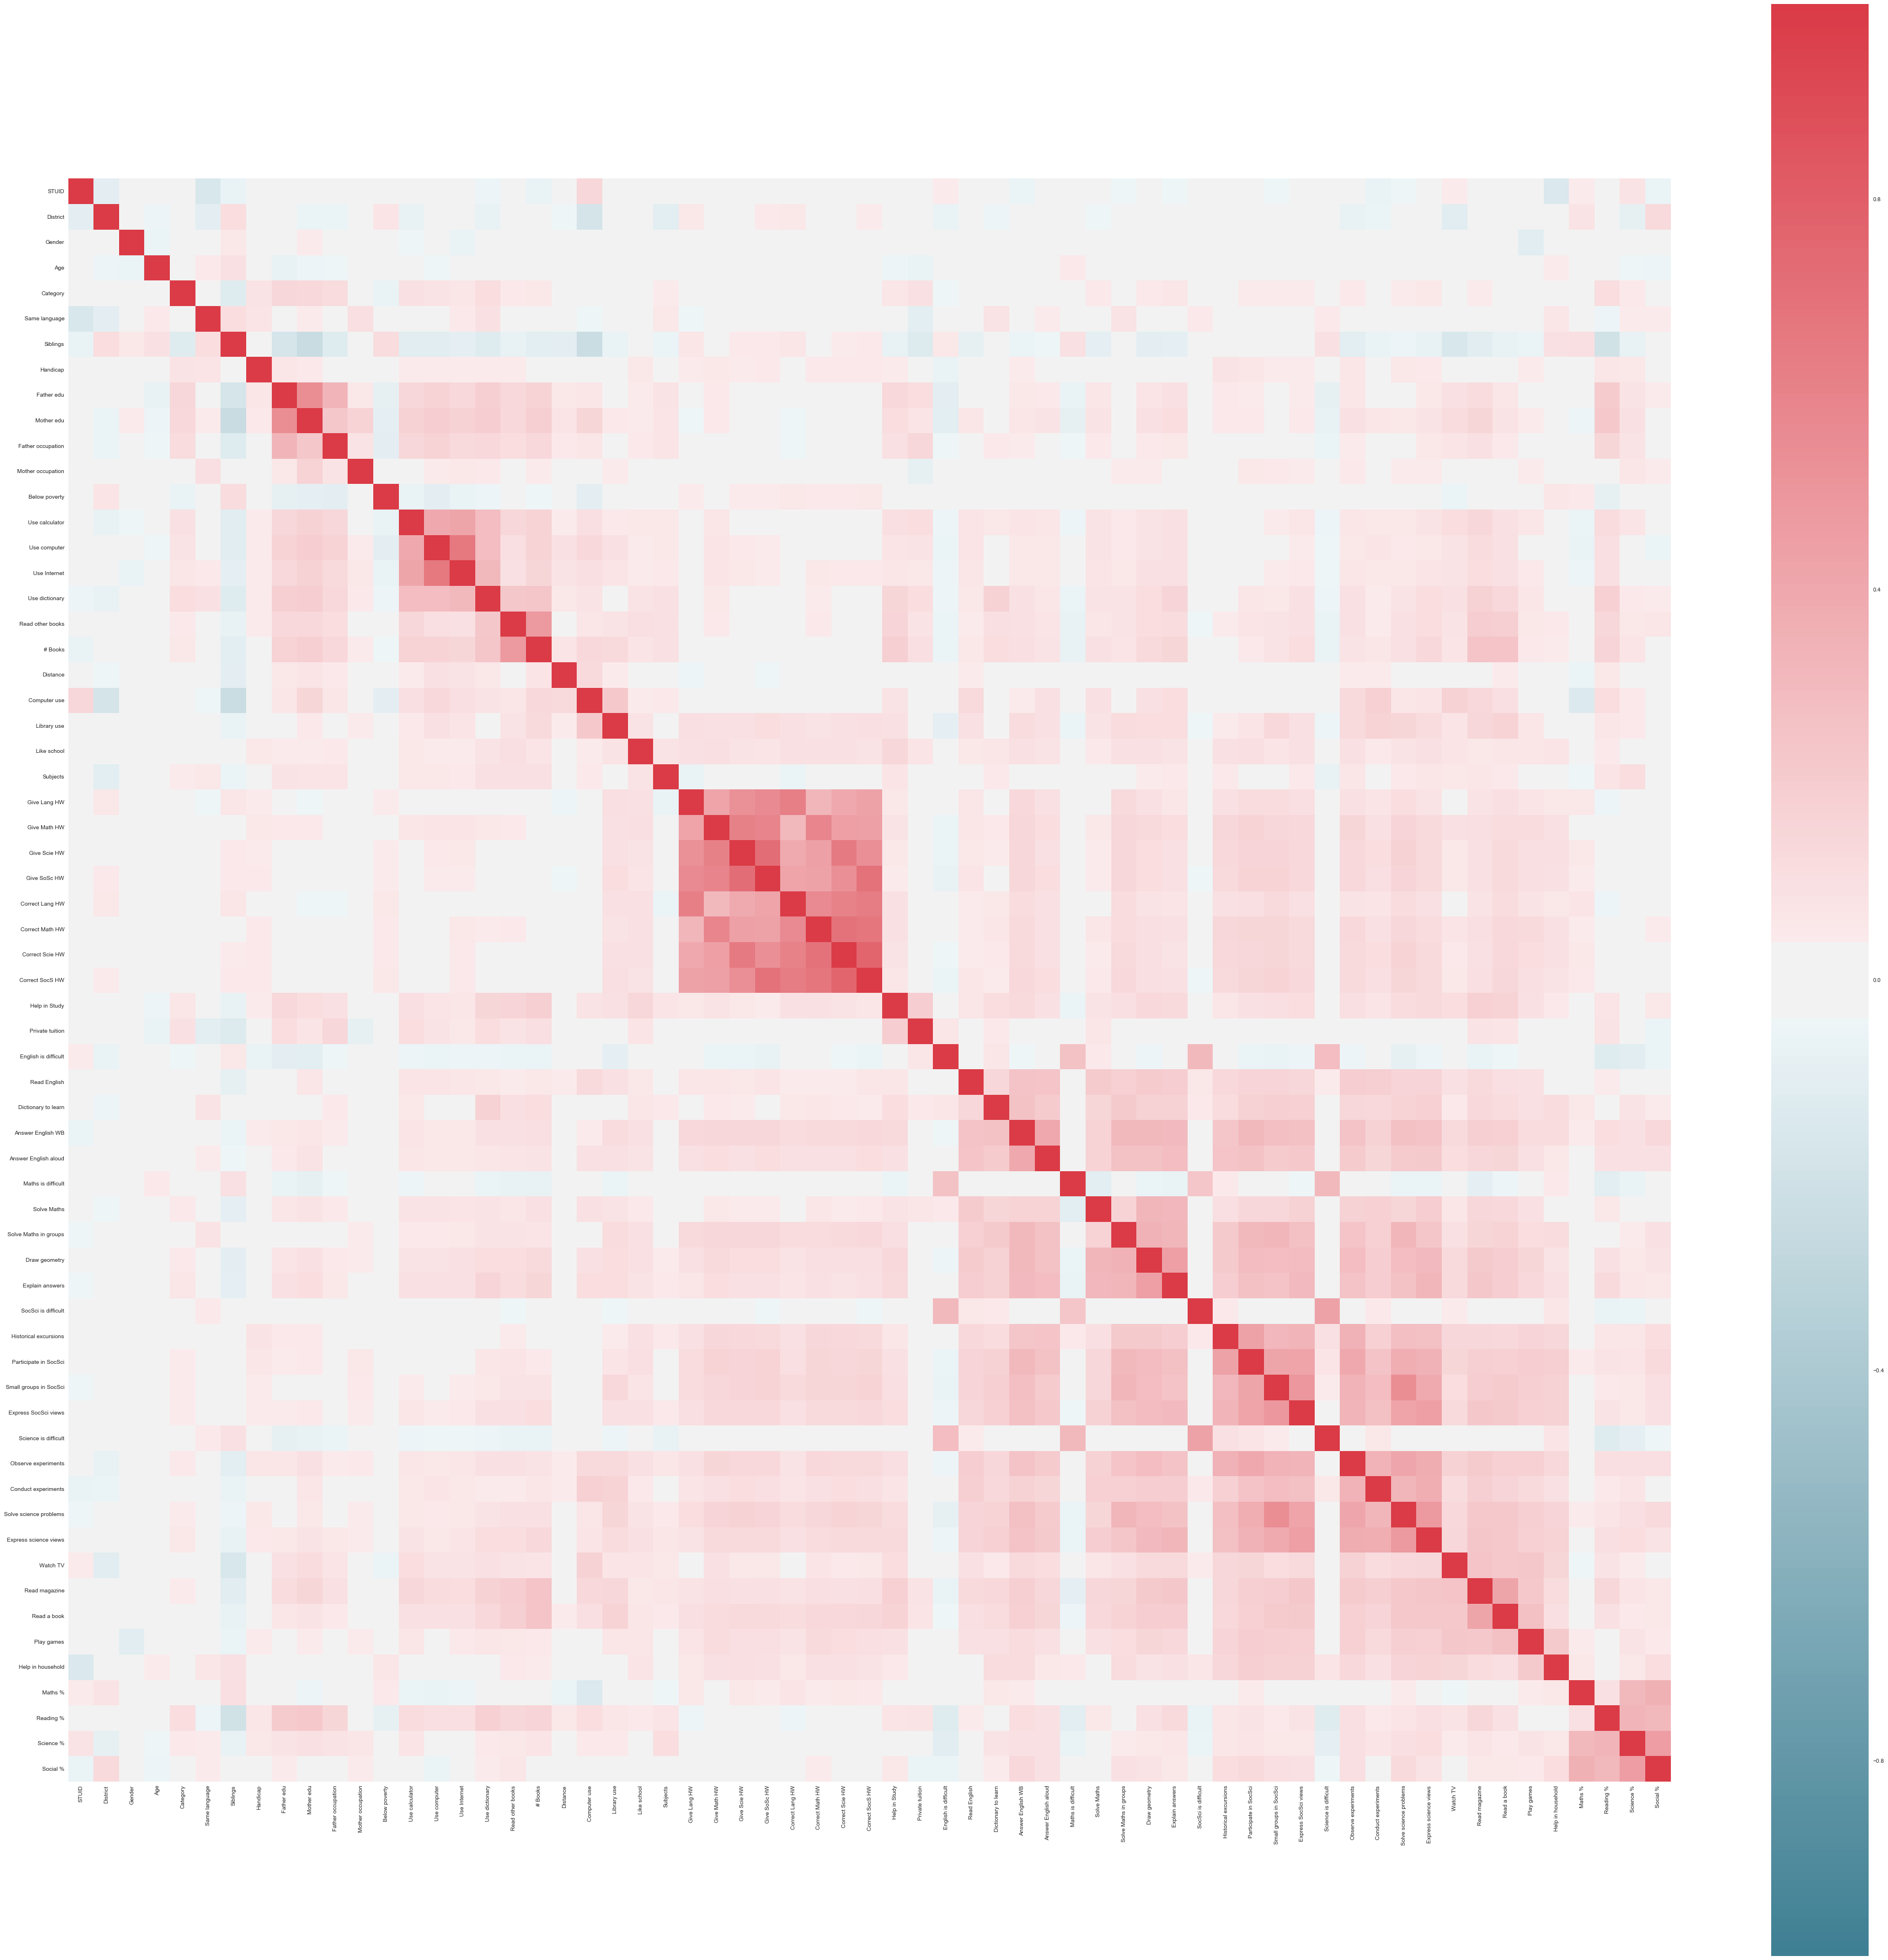

In [46]:
#Dividing Mid
df_Mid = df1.copy();
df_Mid = df_Mid.loc[((df_Mid['Maths %'] >= 33) & (df_Mid['Maths %'] < 81))];
corr = df_Mid.corr()
#df_Top.corr().to_csv('../datasets/nas/MathsMidCorrelation.csv')
f, ax = plt.subplots(figsize=(63, 63))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

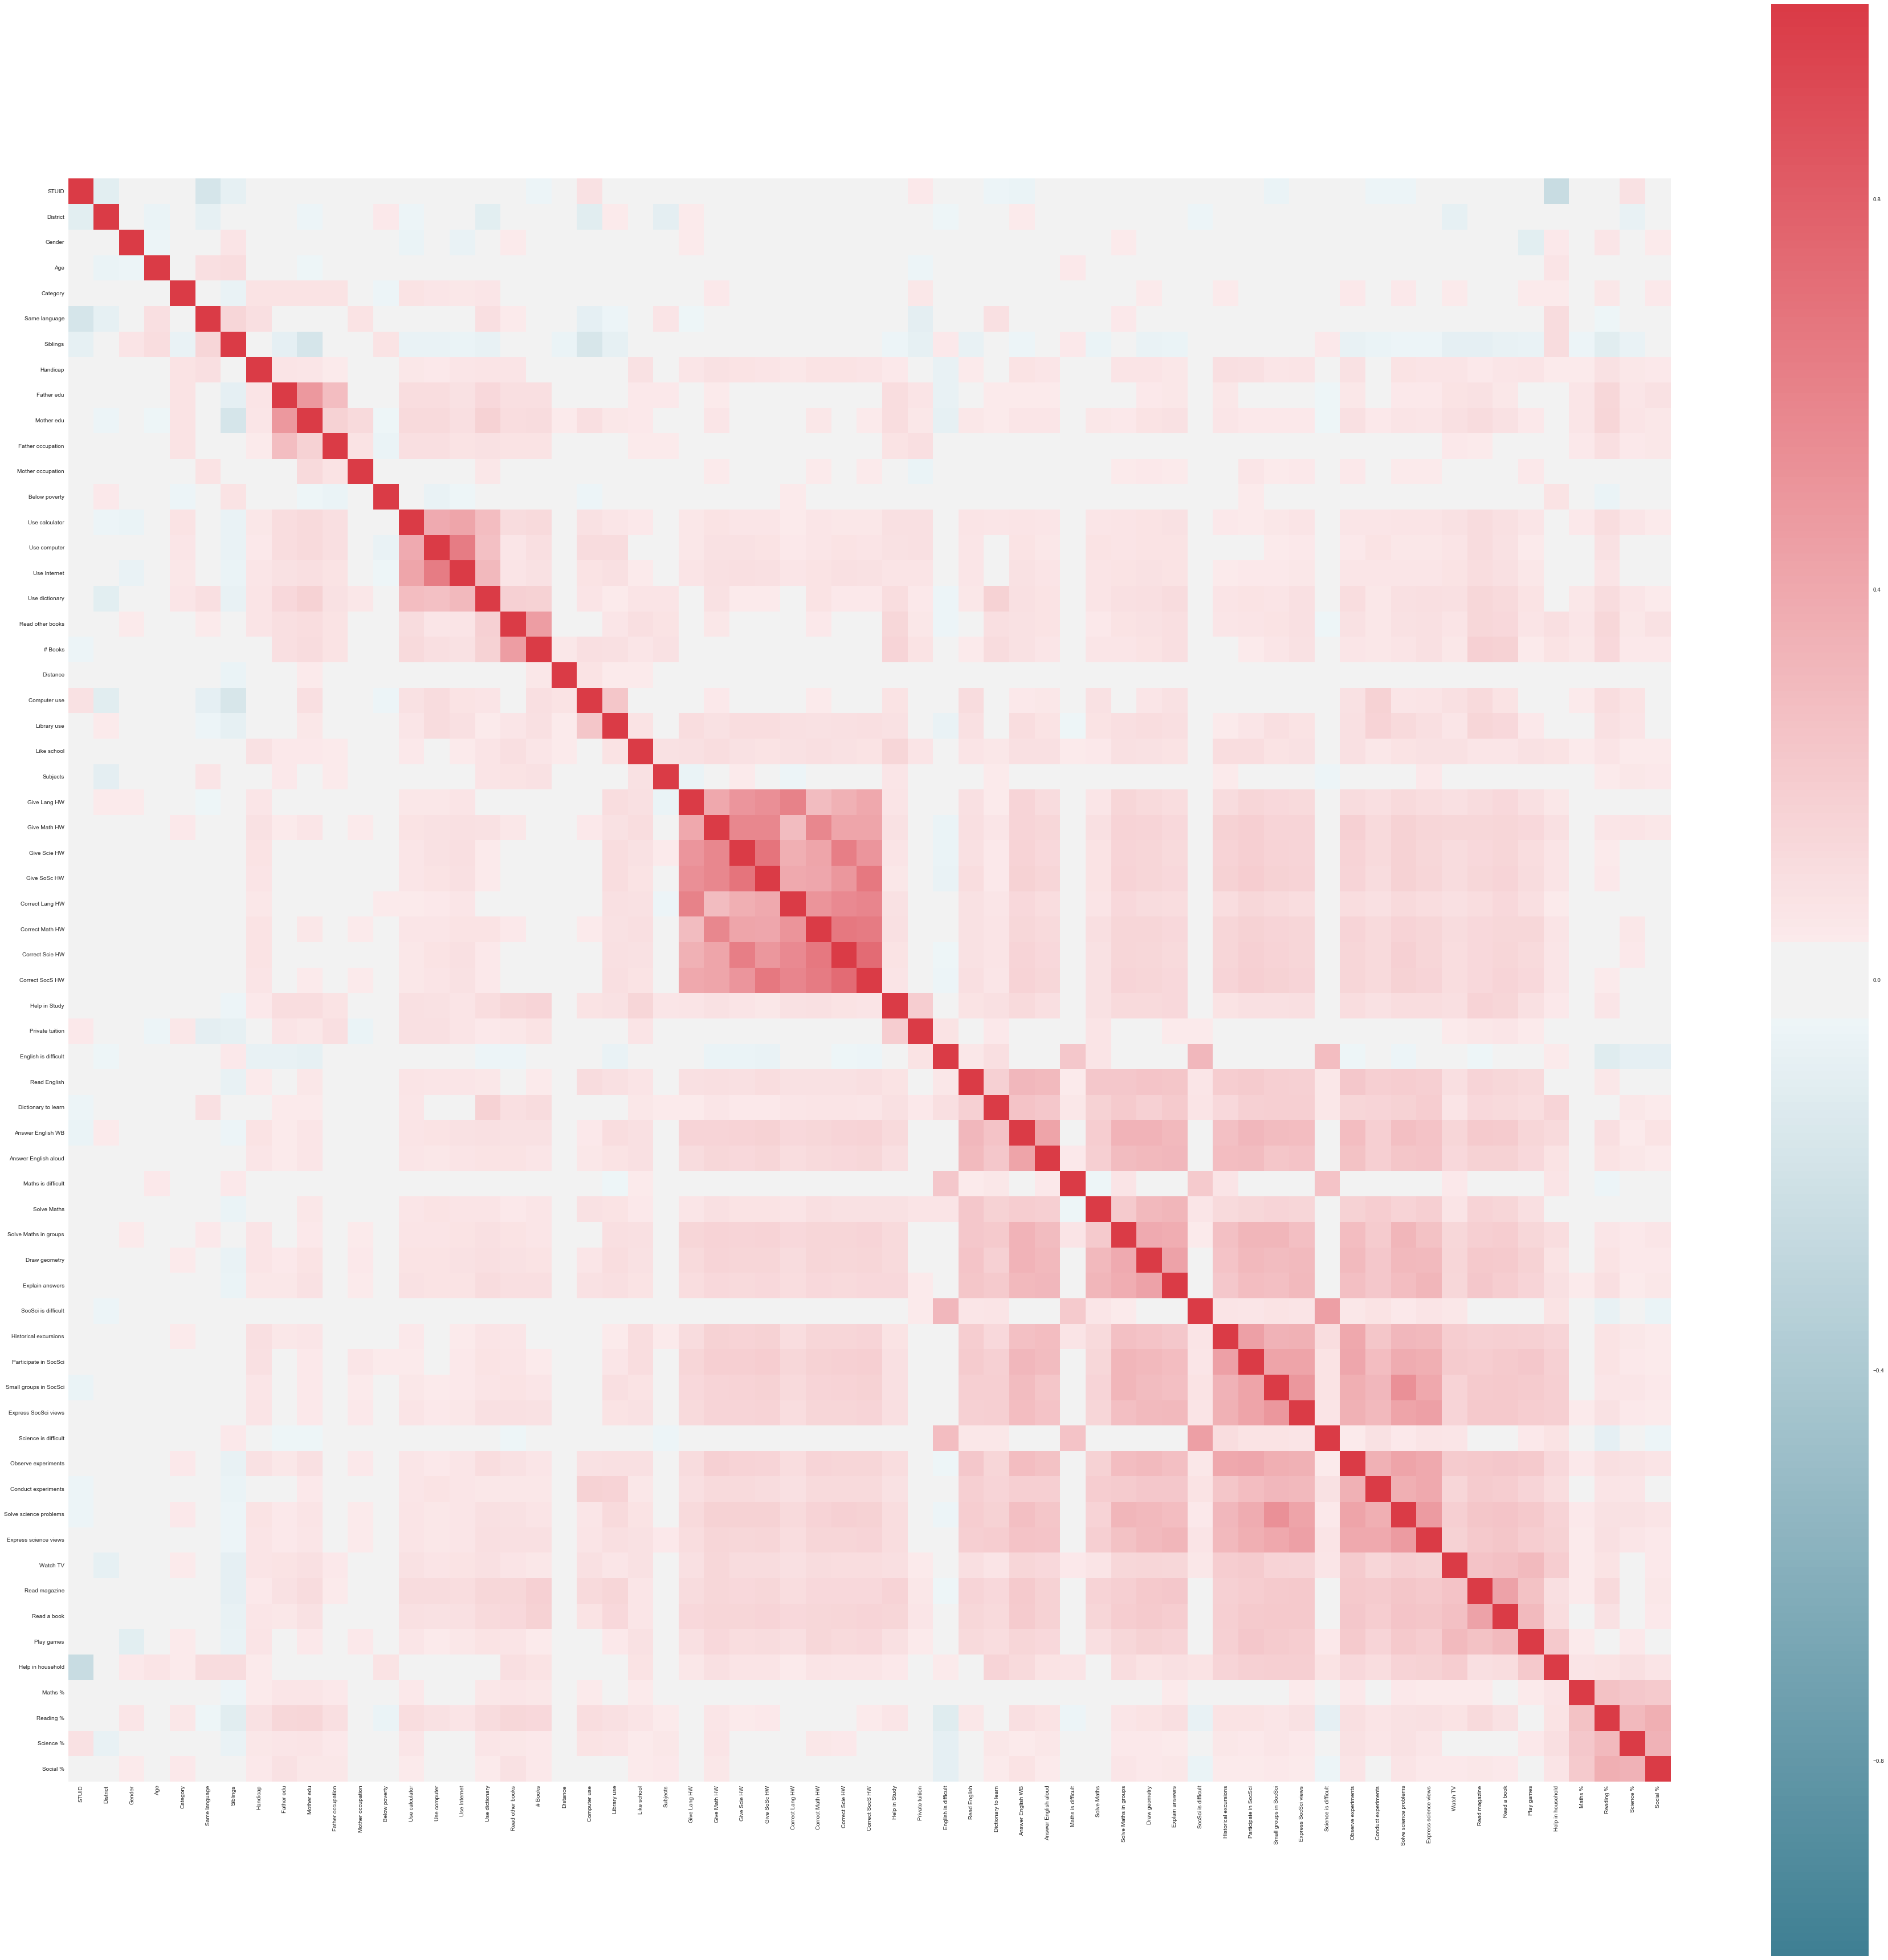

In [45]:
#Dividing Failed
df_Failed = df1.copy();
df_Failed = df_Failed.loc[df_Failed['Maths %'] < 33];
corr = df_Failed.corr();
corr
#df_Failed.corr().to_csv('../datasets/nas/MathsFailedCorrelation.csv')
# plot the heatmap
f, ax = plt.subplots(figsize=(63, 63))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)